# PDBe API Training

This interactive Python notebook will guide you through various ways of programmatically accessing Protein Data Bank in Europe (PDBe) data using REST API

The REST API is a programmatic way to obtain information from the PDB and EMDB. You can access details about:

* sample
* experiment
* models
* compounds
* cross-references
* publications
* quality
* assemblies
and more...
For more information, visit https://www.ebi.ac.uk/pdbe/pdbe-rest-api

# Notebook #6
This notebook is the second in the training material series, and focuses on getting information for multiple PDB entries using the REST search API of PDBe.

## 1) Making imports and setting variables
First, we import some packages that we will use, and set some variables.

Note: Full list of valid URLs is available from https://www.ebi.ac.uk/pdbe/api/doc/

In [69]:
import requests # used for getting data from a URL
from pprint import pprint # pretty print
import matplotlib.pyplot as plt # plotting results
import pandas as pd # used for turning results into mini databases

# make graphs show on the page
%matplotlib inline

# use plotly and cufflinks to make interactive plots
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
cf.go_offline()


# settings for PDBe API
base_url = "https://www.ebi.ac.uk/pdbe/" # the beginning of the URL for PDBe's API.

api_base = base_url + "api/"

search_url = base_url + 'search/pdb/select?' # the rest of the URL used for PDBe's search API. 

## 2) a function to get data from the search API
Let's start with defining a function that can be used to GET data from the PDBe search API.


In [43]:
def make_request(search_term, number_of_rows=10):
    """
    This function can make GET requests to
    the PDBe search API
    
    :param url: String,
    :param pdb_id: String
    :return: JSON
    """
    search_variables = '&wt=json&rows={}'.format(number_of_rows)
    url = search_url+search_term+search_variables
    print(url)
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print("[No data retrieved - %s] %s" % (response.status_code, response.text))
    
    return {}

## 3) formatting the search terms 
This will allow us to use human readable search terms and this function will make a URL that the search API can handle.

In [44]:
def format_search_terms(search_terms, filter_terms=None):
    # print('formatting search terms: %s' % search_terms)
    search_string = ''
    filter_string = ''
    search_list = []
    if isinstance(search_terms, dict):
        for key in search_terms:
            term = search_terms.get(key)
            if ' ' in term:
                if not '"' in term:
                    term = '"{}"'.format(term)
                elif not "'" in term:
                    term = "'{}'".format(term)
            search_list.append('{}:{}'.format(key, term))
        search_string = ' AND '.join(search_list)
    else:
        if '&' in search_terms:
            search_string = search_terms.replace('&', ' AND ')
        else:
            search_string = search_terms
    if filter_terms:
        filter_string = '&fl={}'.format(','.join(filter_terms))
    # print('formatted search terms: %s' % search_string)
    final_search_string = 'q={}{}'.format(search_string, filter_string)
    return final_search_string

## 4) Getting useful data out of the search

This function will run the search and will return a list of the results

In [135]:
def run_search(search_terms, filter_terms=None, number_of_rows=100):
    search_term = format_search_terms(search_terms, filter_terms)

    response = make_request(search_term, number_of_rows)
    results = response.get('response', {}).get('docs', [])
    print('Number of results for {}: {}'.format(','.join(search_terms.values()), len(results)))
    return results
    

## 5) running a search

Now we are ready to actually run a search against the PDB API for entries containing human Dihydrofolate reductase in the PDB. This will return a list of results - only 10 to start with.

A list of search terms is available at:
https://www.ebi.ac.uk/pdbe/api/doc/search

This will return details of human Dihydrofolate reductase's in the PDB

The search terms are defined as a dictionary (a hash in other programming lanuguages). 
e.g. 
{"molecule_name":"Dihydrofolate reductase"}
Here we are searching for molecules named Dihydrofolate reductase.
If we search for two terms i.e. molecule_name and organism_scientific_name then we will get molecules that match both search terms.

We will return the number of results for two searches.

The first one will hit the limit of 100. There are more than 100 Dihydrofolate reductase structures. 
We have to add the argument "number_of_rows" to a higher number, say 1000, to find all the examples. 

In [139]:
print('1st search')
search_terms = {"molecule_name":"Dihydrofolate reductase"} 

results = run_search(search_terms)

1st search
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase"&wt=json&rows=100
Number of results for Dihydrofolate reductase: 100


In [140]:
results = run_search(search_terms, number_of_rows=1000)

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase"&wt=json&rows=1000
Number of results for Dihydrofolate reductase: 362


We will add organism_name of Human to the query to limit the results to only return those that are structures of Human Dihydrofolate reductase.

In [141]:
print('2nd search')
search_terms = {"molecule_name":"Dihydrofolate reductase",
                "organism_name":"Human"
               } 
results = run_search(search_terms)

2nd search
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase" AND organism_name:Human&wt=json&rows=100
Number of results for Dihydrofolate reductase,Human: 79


We will then look at the last result.
We will print the data we have for the first result.

This will be the first item of the list "results"
i.e. results[0]

We are using "pprint" (pretty print) rather than "print" to make the result easier to read.

In [142]:
pprint(results[0])

{'_version_': 1642956939750014976,
 'abstracttext_unassigned': ['Structural data are reported for the first '
                             'example of the potent antifolate inhibitor '
                             "2,4-diamino-5-methyl-6-[(3',4',5'-trimethoxy-N-methylanilino)methyl]pyrido[2,3-d]pyrimidine "
                             '(1) in complex with human dihydrofolate '
                             'reductase (hDHFR) and NADPH. Small differences '
                             'in crystallization conditions resulted in the '
                             'growth of two different forms of a binary '
                             'complex. The structure determination of an '
                             'additional crystal of a ternary complex of hDHFR '
                             'with NADPH and (1) grown under similar '
                             'conditions is also reported. Diffraction data '
                             'were collected to 2.1 A resolution for an R3 '
      

 'q_crystallisation_temperature': 293.0,
 'q_data_quality': -1.0,
 'q_data_reduction_software': ['DENZO'],
 'q_data_scaling_software': ['SCALEPACK'],
 'q_deposition_date': '2003-05-19T01:00:00Z',
 'q_deposition_site': 'RCSB',
 'q_deposition_year': 2003,
 'q_detector': ['Image plate'],
 'q_detector_type': ['RIGAKU RAXIS IIC'],
 'q_diffraction_protocol': ['Single wavelength'],
 'q_diffraction_source_type': ['RIGAKU RU200'],
 'q_diffraction_wavelengths': [1.5418],
 'q_ec_hierarchy_name': ['Oxidoreductases',
                         'Acting on the CH-NH group of donors',
                         'With NAD(+) or NADP(+) as acceptor',
                         'Dihydrofolate reductase'],
 'q_ec_number': ['1.5.1.3'],
 'q_entity_id': 1,
 'q_entity_weight': 21349.525,
 'q_entry_author_list': ['Cody V, Luft JR, Pangborn W, Gangjee A'],
 'q_entry_authors': ['Cody V', 'Luft JR', 'Pangborn W', 'Gangjee A'],
 'q_entry_lig_entity': ['1pd8_CO4_3', '1pd8_NDP_2'],
 'q_enzyme_name': ['Dihydrofolate reduct

                    'NADPH binding',
                    'RNA binding',
                    'sequence-specific mRNA binding',
                    'mRNA binding',
                    'methotrexate binding',
                    'NADP binding',
                    'dihydrofolate reductase activity',
                    'translation repressor activity, mRNA regulatory element '
                    'binding',
                    'drug binding',
                    'one-carbon metabolic process',
                    'folic acid metabolic process',
                    'negative regulation of translation',
                    'response to methotrexate',
                    'regulation of removal of superoxide radicals',
                    'tetrahydrofolate biosynthetic process',
                    'tetrahydrofolate metabolic process',
                    'tetrahydrobiopterin biosynthetic process',
                    'positive regulation of nitric-oxide synthase activity',
                  

As you can see we get lots of data back about the individual molecule we have searched for and the PDB entries in which it is contained. 

We can get the PDB ID and experimental method for this first row as follows.

In [143]:
print(results[0].get('pdb_id'))
print(results[0].get('experimental_method'))

1pd8
['X-ray diffraction']


We can restrict the results to only the information we want using a filter so its easier to see the information we want.

In [208]:
print('3rd search')
search_terms = {"molecule_name":"Dihydrofolate reductase",
                "organism_name":"Human"
               }
filter_terms = ['pdb_id', 'experimental_method']
results = run_search(search_terms, filter_terms)
pprint(results)

3rd search
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase" AND organism_name:Human&fl=pdb_id,experimental_method&wt=json&rows=100
Number of results for Dihydrofolate reductase,Human: 79
[{'experimental_method': ['X-ray diffraction'], 'pdb_id': '1pd8'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '2w3a'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '1s3w'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '4qhv'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '3gyf'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '1u72'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '4keb'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '6dav'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '3ntz'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '4qjc'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '3gi2'},
 {'experimental_method': ['X-ray diffr

## 6) Analysing and plotting the results


We are going to use a Python package called Pandas to help us sort and visualise the results


First we have to do a bit of housekeeping, some of the results are lists (a PDB entry can have more than one experimental method or organism for example) so we need to change them into strings so we can use them in a graph

In [209]:
def change_lists_to_strings(results):
    """
    input - list of results from search
    output - list of results with lists changed into strings
    """
    for row in results:
        for data in row:
            if type(row[data]) == list:
                # if there are any numbers in the list change them into strings
                row[data] = [str(a) for a in row[data]]
                # unique and sort the list and then change the list into a string
                row[data] = ','.join(sorted(list(set(row[data]))))
                
    return results

In [210]:
results = change_lists_to_strings(results)
pprint(results)

[{'experimental_method': 'X-ray diffraction', 'pdb_id': '1pd8'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '2w3a'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '1s3w'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '4qhv'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '3gyf'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '1u72'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '4keb'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '6dav'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '3ntz'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '4qjc'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '3gi2'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '3f91'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '5hpb'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '1hfp'},
 {'experimental_method': 'X-ray diffraction', 'pdb_id': '5hui'},
 {'experimental_method': 

Notice that the only thing that changed is ['X-ray diffraction'] is now 'X-ray diffraction'

If we wanted to know the experimental methods used to determine structures of Human Dihydrofolate reductase we could loop through the results and count how many entries use each experimental method. 

We can use a Python package called Pandas to do this for us. 
It changes the results into a mini database - called a DataFrame. 


In [211]:
def pandas_dataset(list_of_results):
    results = change_lists_to_strings(list_of_results) # we have added our function to change lists to strings
    df = pd.DataFrame(list_of_results)

    return df

df = pandas_dataset(list_of_results=results)
print(df)
    

   experimental_method pdb_id
0    X-ray diffraction   1pd8
1    X-ray diffraction   2w3a
2    X-ray diffraction   1s3w
3    X-ray diffraction   4qhv
4    X-ray diffraction   3gyf
..                 ...    ...
74   X-ray diffraction   5ht5
75   X-ray diffraction   1dlr
76   X-ray diffraction   3s7a
77   X-ray diffraction   4kak
78   X-ray diffraction   5hsu

[79 rows x 2 columns]


We can use the this to count how many PDB codes there are for each experimental method
This groups PDB IDs by experimental method and then counts the number of unique PDB IDs per method.

In [212]:
ds = df.groupby('experimental_method')['pdb_id'].nunique()
print(ds)

experimental_method
Solution NMR          1
X-ray diffraction    78
Name: pdb_id, dtype: int64


We can find which experimental method has the greatest (max) or lowest (min) number of entries.

In [213]:
dt = ds.max()
print(dt)
dt = ds.min()
print(dt)

78
1


We can sort the results so its in decending order and then the first value is the experimental method with the highest number of results

In [214]:
ds.sort_values(ascending=False).index[0]

'X-ray diffraction'

Or sort ascending so the experimental method with the lowest number of results is given

In [215]:
ds.sort_values(ascending=True).index[0]

'Solution NMR'

Or we can then very easily plot these results as a bar chart

In [216]:
ds.iplot(kind='bar')

We will make this into two functions so we can resue them

In [217]:
def pandas_count(list_of_results, column_to_group_by):
    df = pandas_dataset(list_of_results)
    ds = df.groupby(column_to_group_by)['pdb_id'].nunique()
    return ds
    
def pandas_min_max(list_of_results, column_to_group_by, get_min=True):
    df = pandas_dataset(list_of_results)
    if get_min:
        ds = df.groupby(column_to_group_by)['pdb_id'].min()
    else:
        ds = df.groupby(column_to_group_by)['pdb_id'].max()
    return ds
    
def pandas_plot(list_of_results, column_to_group_by, graph_type='bar'):
    ds = pandas_count(list_of_results=list_of_results, column_to_group_by=column_to_group_by)
    ds.iplot(kind=graph_type)


One for counting the results

In [218]:
pandas_count(list_of_results=results, column_to_group_by='experimental_method')

experimental_method
Solution NMR          1
X-ray diffraction    78
Name: pdb_id, dtype: int64

One for getting min or max

In [219]:
print('updated search')
search_terms = {"molecule_name":"Dihydrofolate reductase",
                "organism_name":"Human"
               }
filter_terms = ['pdb_id', 'resolution']
new_results = run_search(search_terms, filter_terms)
pandas_min_max(list_of_results=new_results, column_to_group_by='resolution')

3rd search
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase" AND organism_name:Human&fl=pdb_id,resolution&wt=json&rows=100
Number of results for Dihydrofolate reductase,Human: 79


resolution
1.050    1kmv
1.090    1kms
1.201    4m6j
1.210    5hsr
1.230    3fs6
1.240    3ghw
1.270    2w3b
1.300    3ghc
1.350    3ntz
1.396    4m6k
1.400    2c2s
1.450    3f8y
1.460    5hqy
1.500    2c2t
1.530    3gi2
1.550    6dav
1.600    2w3m
1.610    4qhv
1.620    4qjc
1.650    5hpb
1.700    3eig
1.760    4kfj
1.800    1mvt
1.840    4kbn
1.850    6a7e
1.900    1mvs
1.920    3n0h
2.000    1drf
2.010    3f8z
2.050    4ddr
2.060    6a7c
2.100    1boz
2.200    1pd9
2.300    1dhf
2.411    6de4
2.500    1ohj
2.715    4kd7
Name: pdb_id, dtype: object

and one for plotting the results

In [220]:
pandas_plot(list_of_results=results, column_to_group_by='experimental_method')

Remember this only searched through the first 10 results.
To increase the number of entries we have to run the search again, this time setting number_of_rows to a number in the function run_search. 

In [84]:
search_terms = {"molecule_name":"Dihydrofolate reductase",
                "organism_name":"Human"
               } 
results = run_search(search_terms, number_of_rows=10000)


https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase" AND organism_name:Human&wt=json&rows=10000
Number of results for Dihydrofolate reductase,Human: 79


Then we can count the results using our pandas function above

In [85]:
pandas_count(list_of_results=results, column_to_group_by='experimental_method')

experimental_method
Solution NMR          1
X-ray diffraction    78
Name: pdb_id, dtype: int64

Changing the result so it groups by release year of the PDB entries. 

In [86]:
pandas_count(list_of_results=results, column_to_group_by='release_year')

release_year
1990     2
1992     1
1995     2
1998     6
2002     2
2003     5
2004     3
2005     3
2007     2
2009    13
2010     7
2011     7
2012     1
2013     8
2014     1
2015     2
2017    10
2018     2
2019     2
Name: pdb_id, dtype: int64

And then plot the number of entries released per year

In [87]:
pandas_plot(list_of_results=results, column_to_group_by='release_year')

We can make this into a line graph 

In [88]:
pandas_plot(list_of_results=results, column_to_group_by='release_year', graph_type='line')

Try changing the term you want to search for and see if you get interesting results.

## 7) searching for two terms at once

It would be interesting to see how many PDB entries were solved by each experimental method per year. 

we can use the tag "release_year" to get the year of release of each entry

We have to define a new function to group entries by two terms.

When we do the search we have to filter the results by the terms we want to plot otherwise it takes too long to run. 

In [91]:
search_terms = {"all_enzyme_names":"Lysozyme",
               } 
filter_results = ['beam_source_name','release_year', 'pdb_id']
results = run_search(search_terms, filter_results, number_of_rows=10000)

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=all_enzyme_names:Lysozyme&fl=beam_source_name,release_year,pdb_id&wt=json&rows=10000
Number of results for Lysozyme: 1860


This will take a while as it will return lots of results. 
We can then define a function to group the results by two terms. 

In [229]:
def pandas_plot_multi_groupby(results, first_column_to_group_by, second_column_to_group_by, y_axis='pdb_id', graph_type='line'):
    
    df = pandas_dataset(results)
    new_df = df.groupby([first_column_to_group_by, second_column_to_group_by])
    ds = new_df.count().unstack().reset_index(first_column_to_group_by)
    ds.iplot(x=first_column_to_group_by, y=y_axis, kind=graph_type)
    
def pandas_plot_multi_groupby_min(results, first_column_to_group_by, second_column_to_group_by, y_axis='pdb_id', graph_type='line', use_min=True):
    
    df = pandas_dataset(results)
    new_df = df.groupby([first_column_to_group_by, second_column_to_group_by])
    if use_min:
        ds = new_df.min()
    else:
        ds = new_df.max()
    print(ds)
    #ds.plot(x=first_column_to_group_by, y=y_axis, kind=graph_type)

In [93]:
pandas_plot_multi_groupby(results, 'release_year', 'beam_source_name')

This shows us that rotating anodes were used as the major source of radiation until around 2004 when Synchrotron's overtook as the major source of radiation. 

Try editing the queries to plot interesting trends within the PDB

## Questions to answer

1) Electron Microscopy is going through a revolution. Is this leading to a growth in Electron Microscopy PDB entries?

In [186]:
search_terms = {'experimental_method':'Electron Microscopy'
               } 
filter_results = ['experimental_method','release_year', 'pdb_id']
results = run_search(search_terms, filter_results, number_of_rows=1000000)
pandas_plot_multi_groupby(results, 'release_year', 'experimental_method')

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=experimental_method:"Electron Microscopy"&fl=experimental_method,release_year,pdb_id&wt=json&rows=1000000
Number of results for Electron Microscopy: 43251


In [ ]:
2) New refinement programs have got better and there are more methods to validate the quality of strucures in the PDB.
Have structures got better over time?
We can use "overall_quality" to judge this

In [243]:
search_terms = {'experimental_method':'Electron Microscopy'
               } 
filter_results = ['overall_quality','release_year', 'pdb_id']
results = run_search(search_terms, filter_results, number_of_rows=1000000)

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=experimental_method:"Electron Microscopy"&fl=overall_quality,release_year,pdb_id&wt=json&rows=1000000
Number of results for Electron Microscopy: 43251


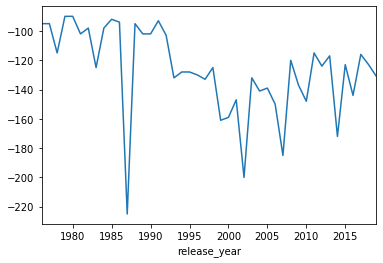

In [238]:
df = pandas_dataset(results)
ds = df.groupby(['release_year'])['overall_quality'].min()
ds.plot(x='release_year', y='overall_quality', kind='line')

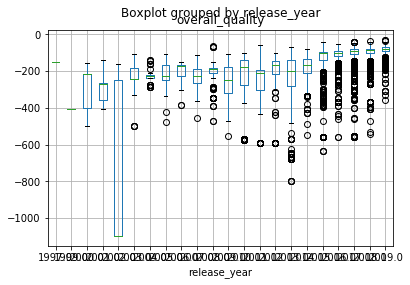

In [245]:
df = pandas_dataset(results)
df.boxplot(column='overall_quality',by='release_year')

2) Electron Microscopy resolution has been said to be improving. Is this true? 
hint - the search term and filter can be different.
It will be necessary to write your own Pandas function to get this to work.

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=experimental_method:"Electron Microscopy"&fl=resolution,release_year,pdb_id&wt=json&rows=1000000
Number of results for Electron Microscopy: 43251


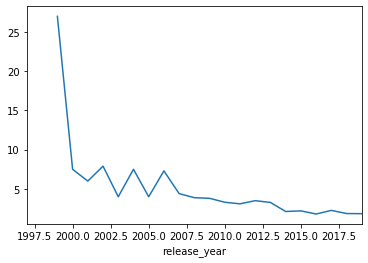

In [187]:
search_terms = {'experimental_method':'Electron Microscopy'
               } 
filter_results = ['resolution','release_year', 'pdb_id']
results = run_search(search_terms, filter_results, number_of_rows=1000000)
df = pandas_dataset(results)
ds = df.groupby(['release_year'])['resolution'].min()
ds.plot(x='release_year', y='resolution', kind='line')

3) It has been said that all the simple structures have been done and that only complicated structures are left. One metric for "complicated" could be molecular weight. 

In [105]:
search_terms = {'experimental_method':'Electron Microscopy'
               } 
filter_results = ['resolution','release_year', 'pdb_id']
results = run_search(search_terms, filter_results, number_of_rows=1000000)
df = pandas_dataset(results)
ds = df.groupby(['release_year'])['resolution'].min()
ds.plot(x='release_year', y='resolution', kind='line')

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=experimental_method:"Electron Microscopy"&fl=resolution,release_year,pdb_id&wt=json&rows=1000000
Number of results for Electron Microscopy: 43251


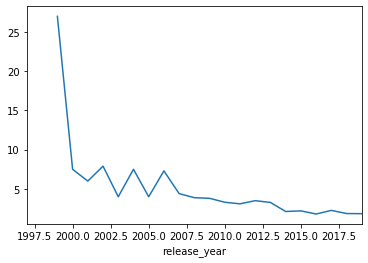

In [126]:
pandas_plot_multi_groupby(results, 'release_year', 'experimental_method')
#pandas_count(list_of_results=results, column_to_group_by='resolution')

